# Data Science and Business Analytics Internship

## GRIP : The Sparks Foundation

## Author : Navnath Satre
## Task 6 : Prediction using Decision Tree Algorithm

**Q) Create the Decision Tree classifier and visualize it graphically.**

*The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.*

Dataset is available at: https://bit.ly/3kXTdox

### Importing the libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import the data set from locally saved

In [31]:
data = pd.read_csv("Iris.csv")
print("Data import successfuly")

Data import successfuly


### See the first 5  records in the data set

In [32]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### See the last 5  records in the data set

In [33]:
data.tail() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### To check the no. of rows and columns

In [34]:
data.shape

(150, 6)

### Drop 'Id' column 

In [35]:
data.drop('Id',inplace=True,axis=1)

### Statistic values of our data

In [36]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check null values in the data set

In [37]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

*There are no NULL values in the Dataset.*

### To print the full summary of the dataframe .

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Check the correlation

In [39]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Visualizing the dataset

### Correlation using heatmap

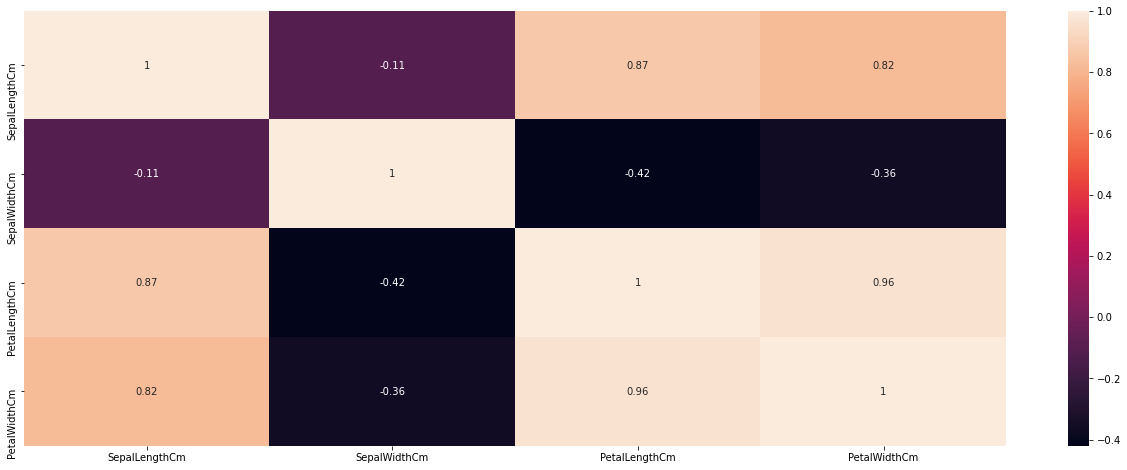

In [40]:
plt.figure(figsize=(22,8))
sns.heatmap(data.corr(), annot=True)# annot = True to print the values inside the square
plt.show()

### Chekcing the data is balace or not

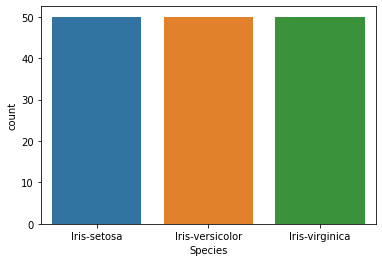

In [41]:
sns.countplot(x='Species',data=data)
plt.show()

### Set labels for 'species' data

In [42]:
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualizing data with pair plots

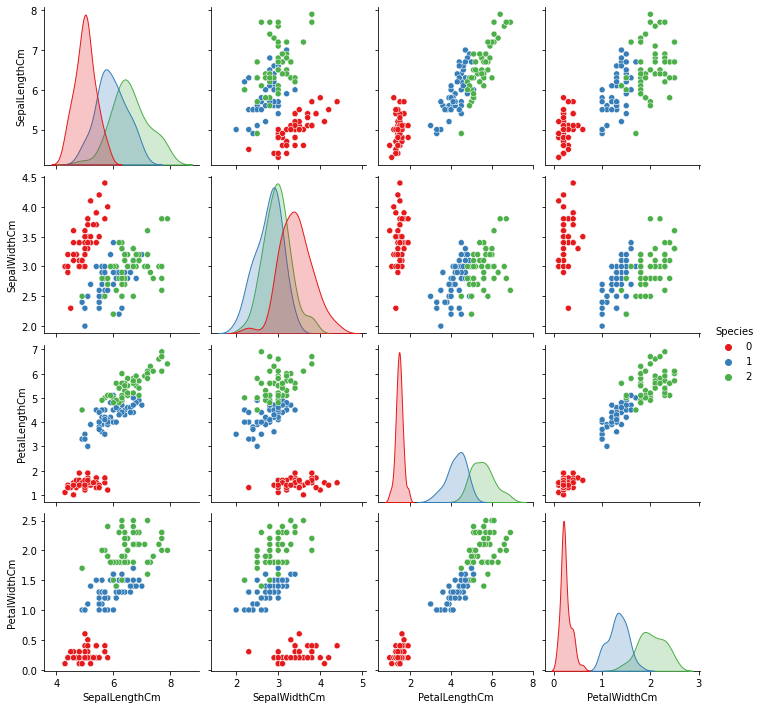

In [43]:
sns.pairplot(data,hue='Species',palette='Set1')
plt.show()

*It can be inferred from the plot that Iris-setosa forms a separate cluster, as compared to the other two species, Iris-versicolor and Iris-virginica which form closely placed clusters.*

### Species in form of violin chart

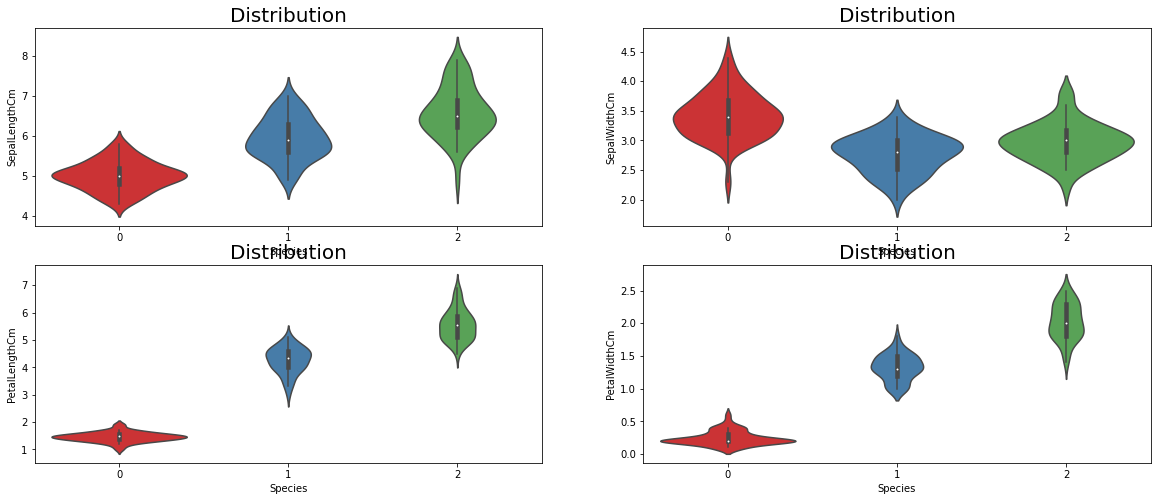

In [44]:
plt.figure(figsize=(20,8))
plt.subplot(221);sns.violinplot(x='Species',y='SepalLengthCm',data=data,palette='Set1');plt.title('Distribution',size=20)
plt.subplot(222);sns.violinplot(x='Species',y='SepalWidthCm',data=data,palette='Set1');plt.title('Distribution',size=20)
plt.subplot(223);sns.violinplot(x='Species',y='PetalLengthCm',data=data,palette='Set1');plt.title('Distribution',size=20)
plt.subplot(224);sns.violinplot(x='Species',y='PetalWidthCm',data=data,palette='Set1');plt.title('Distribution',size=20)
plt.show()

### Dividing Data into dependent variable and independent variable

In [45]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [46]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Training the Model

### Importing the libraries

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree

### Splitting the data into train and test set

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) 

### Build a Model

In [50]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print("Training Complete.")

Training Complete.


### Prediction and Comparision

In [51]:
y_pred = classifier.predict(X_test)

### Confusion Matrix

In [52]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)

### Classification Report

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Accuracy Score

In [54]:
accuracy_score(y_test,y_pred)

0.9777777777777777

*We have got around 98% Accuracy For This Model.*

## Visualize decision tree

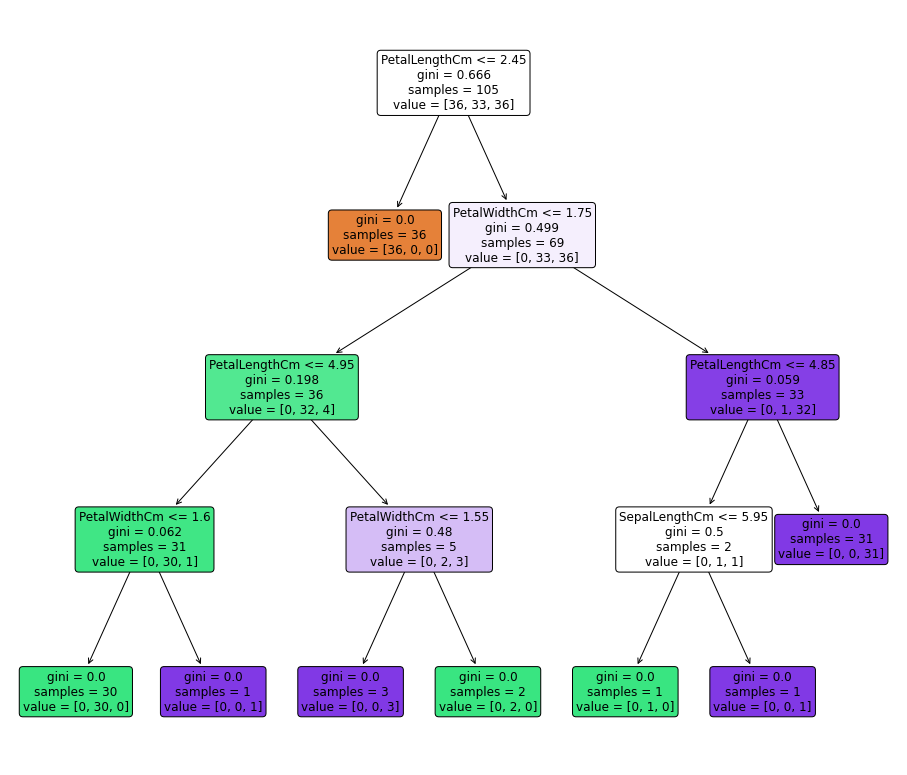

In [55]:
plt.figure(figsize=(16,14))
dtree= tree.plot_tree(classifier,feature_names=x.columns,fontsize=12,filled=True,rounded=True)

## Prediction on New Data

In [56]:
new_data=pd.DataFrame({'SepalLengthCm':[3.1,2.4],'SepalWidthCm':[4.3,6.1],
                       'PetalLengthCm':[2.2,3.3],'PetalWidthCm':[0.8,0.7]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.1,4.3,2.2,0.8
1,2.4,6.1,3.3,0.7


In [57]:
new_predict = classifier.predict(new_data)

In [58]:
new_data['Predicted Species'] = new_predict
new_data  #Here 0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,3.1,4.3,2.2,0.8,0
1,2.4,6.1,3.3,0.7,1


*This is prediction of new data*

**Now we can test any data to this classifer and it would be able to predict the right class accordingly.**

# Thank You...